# Libraries

In [146]:
import numpy as np

import matplotlib.pyplot as plt

import cv2
from PIL import Image

from torch import nn
from torchvision import transforms

import torch

# 1. Visualization of Patches

## 1.1 Plot Sample Image

Sample is H = 224 and W = 224 pixels.


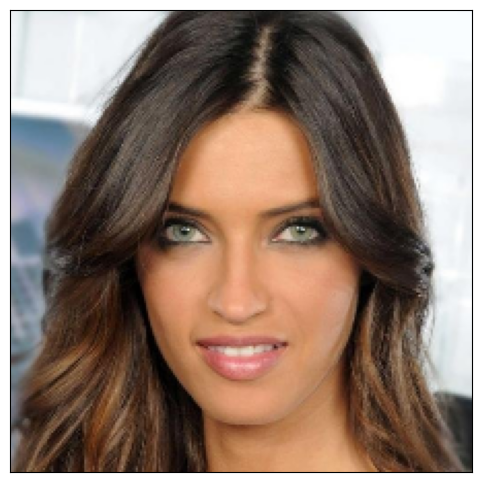

In [13]:
sample = cv2.imread("./sample.jpg")
shape = (224,224)
sample = cv2.resize(sample,shape)
sample = cv2.cvtColor(sample,cv2.COLOR_BGR2RGB)

H = sample.shape[0]
W = sample.shape[1]
print('Sample is H =', H, 'and W =', W, 'pixels.')

fig = plt.figure(figsize=(10,6))
plt.imshow(sample)
plt.xticks([])
plt.yticks([])
plt.show()

## 1.2 Num of Patches

In [81]:
aux = []
for i in range(1,H):
    if(H%i == 0):
        aux.append(i)
print(aux)

[1, 2, 4, 7, 8, 14, 16, 28, 32, 56, 112]


There will be 196 patches, each 16 by 16.




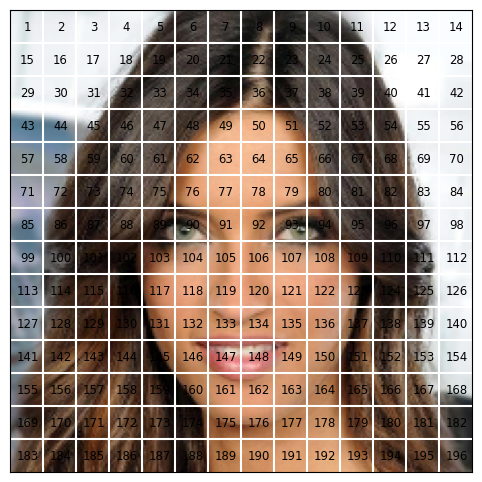

In [80]:
patch_size = 16
num_patches = int((H*W)/(patch_size**2))
print('There will be', num_patches, 'patches, each', patch_size, 'by', str(patch_size)+'.')
print('\n')

fig = plt.figure(figsize=(10,6))
plt.imshow(sample, cmap='Purples_r')
plt.hlines(np.arange(patch_size, H, patch_size)-0.5, -0.5, W-0.5, color='w')
plt.vlines(np.arange(patch_size, W, patch_size)-0.5, -0.5, H-0.5, color='w')
plt.xticks([])
plt.yticks([])

text = np.linspace(int(patch_size/2), W - int(patch_size/2), int(num_patches**0.5))

num = 1
for text_i in text:
    for text_j in text:
        plt.text(text_j,text_i, str(num), color='black', fontsize='small', ha='center',va='center')
        num +=1
#plt.text(x_text[2], y_text[2], str(3), color='k', fontsize='xx-large', ha='center');
#plt.savefig(os.path.join(figure_path, 'mountain_patches.png'), bbox_inches='tight'

# 2. Patch Tokenization

In [204]:
class Patch_Tokenization(nn.Module):
    def __init__(self,
                img_size: tuple[int, int, int]=(1, 1, 60, 100),
                patch_size: int=50,
                token_len: int=768):

        """ Patch Tokenization Module
            Args:
                img_size (tuple[int, int, int]): size of input (channels, height, width)
                patch_size (int): the side length of a square patch
                token_len (int): desired length of an output token
        """
        super().__init__()

        ## Defining Parameters
        self.img_size = img_size
        B, C, H, W = self.img_size
        self.patch_size = patch_size
        self.token_len = token_len
        assert H % self.patch_size == 0, 'Height of image must be evenly divisible by patch size.'
        assert W % self.patch_size == 0, 'Width of image must be evenly divisible by patch size.'
        self.num_tokens = (H / self.patch_size) * (W / self.patch_size)

        ## Defining Layers
        self.split = nn.Unfold(kernel_size=self.patch_size, stride=self.patch_size, padding=0)
        self.project = nn.Linear((self.patch_size**2)*C, token_len)

    def forward(self, x):
        x = self.split(x).transpose(2,1)
        x = self.project(x)
        return x

## 2.1 Applying tokenize

In [205]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),       # Resize the image to 256x256 pixels
    transforms.ToTensor(),            # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

In [206]:
image = Image.open("./sample.jpg")


image_transform = transform(image)
image_transform = image_transform.unsqueeze(0)
image_transform = torch.cat([image_transform]*7)

In [207]:
patch_tokenization = Patch_Tokenization(
    img_size=image_transform.shape,
    patch_size=patch_size,
    token_len=512
)
image_token = patch_tokenization(image_transform)

#image_token = 

print(image_token.shape)
print(image_token)

torch.Size([7, 196, 512])
tensor([[[-1.2840, -0.1178,  0.6748,  ..., -0.7544, -1.3976, -0.5877],
         [-1.3489, -0.2010,  0.7438,  ..., -0.8559, -1.4753, -0.6436],
         [-1.4095, -0.1915,  0.7959,  ..., -0.9019, -1.4940, -0.5599],
         ...,
         [ 0.4057, -0.0423, -0.5517,  ...,  0.1920,  0.9332,  0.6676],
         [ 0.5181, -0.0296, -0.5567,  ...,  0.2583,  0.7077, -0.1488],
         [ 0.0257,  0.0136, -0.6974,  ..., -0.1440,  0.1665,  0.0116]],

        [[-1.2840, -0.1178,  0.6748,  ..., -0.7544, -1.3976, -0.5877],
         [-1.3489, -0.2010,  0.7438,  ..., -0.8559, -1.4753, -0.6436],
         [-1.4095, -0.1915,  0.7959,  ..., -0.9019, -1.4940, -0.5599],
         ...,
         [ 0.4057, -0.0423, -0.5517,  ...,  0.1920,  0.9332,  0.6676],
         [ 0.5181, -0.0296, -0.5567,  ...,  0.2583,  0.7077, -0.1488],
         [ 0.0257,  0.0136, -0.6974,  ..., -0.1440,  0.1665,  0.0116]],

        [[-1.2840, -0.1178,  0.6748,  ..., -0.7544, -1.3976, -0.5877],
         [-1.3489, 

# 3. Build Vision Transformer Model

In [ ]:
class VisionModel(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers):
        super(VisionTransformer, self).__init__()
        
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.cls_token = nn.Parameter(torch.zeros(1, 1, self.token_len))
        self.emb_posi = nn.Parameter(
            data=get_sinusoid_encoding(num_tokens, token_len),
            requires_grad=False
        )

    def get_sinusoid_encoding(self, num_tokens, token_len):
        """ Make Sinusoid Encoding Table
    
            Args:
                num_tokens (int): number of tokens
                token_len (int): length of a token
                
            Returns:
                (torch.FloatTensor) sinusoidal position encoding table
        """
    
        def get_position_angle_vec(i):
            return [i / np.power(10000, 2 * (j // 2) / token_len) for j in range(token_len)]
    
        sinusoid_table = np.array([get_position_angle_vec(i) for i in range(num_tokens)])
        sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
        sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2]) 
    
        return torch.FloatTensor(sinusoid_table).unsqueeze(0)

In [208]:
image_token.shape

torch.Size([7, 196, 512])

In [214]:
PE = get_sinusoid_encoding(int(patch_tokenization.num_tokens)+1, int(patch_tokenization.token_len))

In [215]:
PE.shape

torch.Size([1, 197, 512])

In [216]:
pred_token = torch.zeros(1, 1, int(patch_tokenization.token_len)).expand(7,-1,-1)

In [217]:
pred_token.shape

torch.Size([7, 1, 512])

In [220]:
image_token_with_pred_token = torch.cat((pred_token,image_token),dim=1)

In [222]:
image_token_with_pred_token.shape

torch.Size([7, 197, 512])

In [234]:
x = image_token_with_pred_token + PE
x.shape

torch.Size([7, 197, 512])

In [148]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VisionTransformer(nn.Module):
    def __init__(self, num_patches, embed_dim, num_heads, num_layers, num_classes):
        super(VisionTransformer, self).__init__()
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.positional_encoding = nn.Parameter(torch.randn(1, num_patches + 1, embed_dim))
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.mlp_head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        B, N, E = x.shape  # Batch size, number of patches, embedding dimension
        cls_tokens = self.cls_token.expand(B, -1, -1)  # (B, 1, E)
        x = torch.cat((cls_tokens, x), dim=1)  # (B, N+1, E)
        x = x + self.positional_encoding[:, :N+1, :]
        x = x.permute(1, 0, 2)  # (N+1, B, E) for transformer
        x = self.transformer_encoder(x)  # (N+1, B, E)
        #x = x[0]  # Take the cls token output (1, B, E)
        #x = self.mlp_head(x)  # (B, num_classes)
        return x

In [149]:
# Example usage
src = torch.rand((32, 196, 512))  # (batch_size, num_patches, embedding_dim)
model = VisionTransformer(num_patches=196, embed_dim=512, num_heads=8, num_layers=6, num_classes=10)
out = model(src)  # (batch_size, num_classes)

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [150]:
out[:,0].shape

torch.Size([197, 512])

In [3]:
from einops import rearrange
from efficientnet_pytorch import EfficientNet
from torchvision import transforms

from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),       # Resize the image to 256x256 pixels
    transforms.ToTensor(),               # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

In [6]:
# Define model parameters
num_patches = 196  # Assuming a 14x14 grid of patches for a 224x224 image
embed_dim = 256
num_heads = 8
num_layers = 6
num_classes = 1000  # Number of output classes for classification (not used for reconstruction)
img_size = 224
patch_size = 16

In [7]:
class VisionTransformer(nn.Module):
    def __init__(self, num_patches, embed_dim, num_heads, num_layers, num_classes, img_size, patch_size):
        super(VisionTransformer, self).__init__()
        patch_dim = channels * patch_size ** 2

        self.patch_size = patch_size
        
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.positional_encoding = nn.Parameter(torch.randn(1, num_patches + 1, embed_dim))
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Decoder
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        
        self.linear = nn.Linear(embed_dim, embed_dim * 4)  # Linear layer to match decoder input size
        self.final_layer = nn.Linear(embed_dim * 4, 3 * img_size * img_size)  # Final linear layer for image reconstruction

    def forward(self, x):
        p = self.patch_size
        
        y = rearrange(x, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = p, p2 = p)
        B, N, E = x.shape  # Batch size, number of patches, embedding dimension
        cls_tokens = self.cls_token.expand(B, -1, -1)  # (B, 1, E)
        x = torch.cat((cls_tokens, x), dim=1)  # (B, N+1, E)
        x = x + self.positional_encoding[:, :N+1, :]
        encoder_input = x.permute(1, 0, 2)  # (N+1, B, E) for transformer encoder
        
        # Transformer encoder
        encoder_output = self.transformer_encoder(encoder_input)  # (N+1, B, E)
        
        # Transformer decoder
        decoder_input = self.linear(encoder_output[0])  # Take the cls token output (1, B, E)
        decoder_input = decoder_input.unsqueeze(0)  # Add a time dimension
        decoder_input = decoder_input.repeat(N+1, 1, 1)  # Repeat for all patches
        decoder_output = self.transformer_decoder(decoder_input, encoder_output)  # (N+1, B, E)
        
        # Final linear layer for image reconstruction
        x = self.final_layer(decoder_output.permute(1, 0, 2))  # (B, N+1, 3 * img_size * img_size)
        x = x.view(B, 3, img_size, img_size)  # Reshape to (B, 3, img_size, img_size)
        
        return x


In [8]:
model = VisionTransformer(num_patches, embed_dim, num_heads, num_layers, num_classes, img_size, patch_size)

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [34]:
x = torch.rand(10,3,224,224)
channels = 3
patch_size = 16 #Divisivel por 224
dim = 1024
emb_dim = 512

patch_dim = channels * patch_size ** 2

p = patch_size

patch_to_embedding = nn.Linear(patch_dim, dim)

cls_token = nn.Parameter(torch.randn(1, 1, dim))
pos_embedding = nn.Parameter(torch.randn(emb_dim, 1, dim))

In [35]:
y = rearrange(x, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = p, p2 = p)

In [36]:
y.shape

torch.Size([10, 196, 768])

In [37]:
y_emb = patch_to_embedding(y)
y_emb.shape

torch.Size([10, 196, 1024])

In [38]:
cls_tokens = cls_token.expand(x.shape[0], -1, -1)
cls_tokens.shape

torch.Size([10, 1, 1024])

In [39]:
x = torch.cat((cls_tokens, y_emb), 1)
x.shape

torch.Size([10, 197, 1024])

In [40]:
pos_embedding = nn.Parameter(torch.randn(emb_dim, 1, dim))

In [41]:
shape=x.shape[0]
x += pos_embedding[0:shape]

In [42]:
x.shape

torch.Size([10, 197, 1024])

In [3]:

efficient_net = EfficientNet.from_pretrained('efficientnet-b0')

Loaded pretrained weights for efficientnet-b0


In [4]:
img = Image.open("./sample.jpg")
img = transform(img)
x = efficient_net.extract_features(img.unsqueeze(0))

In [5]:
x.shape

torch.Size([1, 1280, 7, 7])

In [127]:
x = torch.rand(10,1280,7,7)

dim = 1024
emb_dim = 32
channels = 1280
patch_size = 7

p = patch_size

patch_dim = channels * patch_size ** 2

patch_to_embedding = nn.Linear(patch_dim, dim)

In [128]:
patch_to_embedding

Linear(in_features=62720, out_features=1024, bias=True)

In [129]:
y = rearrange(x, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = p, p2 = p)

In [130]:
y.shape

torch.Size([10, 1, 62720])

In [131]:
patch_dim

62720

In [132]:
y_emb = patch_to_embedding(y)
print(y_emb.shape)

torch.Size([10, 1, 1024])


In [133]:
cls_token = nn.Parameter(torch.randn(1, 1, dim))
cls_token.shape

torch.Size([1, 1, 1024])

In [134]:
cls_tokens = cls_token.expand(x.shape[0], -1, -1)
cls_tokens.shape

torch.Size([10, 1, 1024])

In [135]:
x = torch.cat((cls_tokens, y_emb), 1)

In [136]:
x.shape

torch.Size([10, 2, 1024])

In [137]:
shape=x.shape[0]
shape

10

In [138]:
pos_embedding = nn.Parameter(torch.randn(emb_dim, 1, dim))
pos_embedding.shape

torch.Size([32, 1, 1024])

In [139]:
pos_embedding[0:shape].shape

torch.Size([10, 1, 1024])

In [144]:
x_sum = x + pos_embedding[0:shape]

In [145]:
x_sum.shape

torch.Size([10, 2, 1024])

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VisionTransformer(nn.Module):
    def __init__(self, num_patches, embed_dim, num_heads, num_layers, num_classes, img_size, patch_size):
        super(VisionTransformer, self).__init__()
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.positional_encoding = nn.Parameter(torch.randn(1, num_patches + 1, embed_dim))
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Decoder
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        
        self.linear = nn.Linear(embed_dim, embed_dim * 4)  # Linear layer to match decoder input size
        self.final_layer = nn.Linear(embed_dim * 4, 3 * img_size * img_size)  # Final linear layer for image reconstruction

    def forward(self, x):
        y = rearrange(x, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = p, p2 = p)
        B, N, E = x.shape  # Batch size, number of patches, embedding dimension
        cls_tokens = self.cls_token.expand(B, -1, -1)  # (B, 1, E)
        x = torch.cat((cls_tokens, x), dim=1)  # (B, N+1, E)
        x = x + self.positional_encoding[:, :N+1, :]
        encoder_input = x.permute(1, 0, 2)  # (N+1, B, E) for transformer encoder
        
        # Transformer encoder
        encoder_output = self.transformer_encoder(encoder_input)  # (N+1, B, E)
        
        # Transformer decoder
        decoder_input = self.linear(encoder_output[0])  # Take the cls token output (1, B, E)
        decoder_input = decoder_input.unsqueeze(0)  # Add a time dimension
        decoder_input = decoder_input.repeat(N+1, 1, 1)  # Repeat for all patches
        decoder_output = self.transformer_decoder(decoder_input, encoder_output)  # (N+1, B, E)
        
        # Final linear layer for image reconstruction
        x = self.final_layer(decoder_output.permute(1, 0, 2))  # (B, N+1, 3 * img_size * img_size)
        x = x.view(B, 3, img_size, img_size)  # Reshape to (B, 3, img_size, img_size)
        
        return x


In [2]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

# Load an example image
image_path = "./sa"
img = Image.open(image_path)

# Define transformations to prepare the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to desired input size
    transforms.ToTensor(),           # Convert image to tensor
])

# Apply transformations
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Define model parameters
num_patches = 196  # Assuming a 14x14 grid of patches for a 224x224 image
embed_dim = 256
num_heads = 8
num_layers = 6
num_classes = 1000  # Number of output classes for classification (not used for reconstruction)
img_size = 224
patch_size = 16

# Create the VisionTransformer model
model = VisionTransformer(num_patches, embed_dim, num_heads, num_layers, num_classes, img_size, patch_size)

# Perform forward pass to reconstruct the image
reconstructed_img = model(img_tensor)

# Convert the tensor to a PIL image
reconstructed_img_pil = transforms.ToPILImage()(reconstructed_img.squeeze())

# Display the reconstructed image
reconstructed_img_pil.show()


/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")

ValueError: too many values to unpack (expected 3)